## Instanciar paquetes

In [224]:
import pandas as pd
import numpy as np
# import datetime as dt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Formato de visualización por centenas
pd.options.display.float_format = '{:,.2f}'.format

# Graficas
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;sns.set_theme(color_codes=True)

print("Setup complete")


Setup complete


In [52]:
import chardet
with open('E:\\skillsForIndustry/banorte/data/muestra_abandono.csv','rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


## Importar Data

In [133]:
path = r'E:\\skillsForIndustry/banorte/data/muestra_abandono.csv'

abandono = pd.read_csv(path, sep="\t",quotechar='',encoding='ISO-8859-1',index_col = False,
                       engine='python', header=0,names = ['seg','tipo_seg','con_crd',
                                                             'Rango_Ant','Rango_score',
                                                             'Rango_disp_prom','Rango_UDIR_anual',
                                                             'Rango_Num_Productos','rango_sdo_capta',
                                                             'conteo','udir_anual'])

In [134]:
# path = r'E:\\skillsForIndustry/banorte/data/muestra_abandono.txt'

# cols =['seg','tipo_seg','con_crd','Rango_Ant','Rango_score','Rango_disp_prom','Rango_UDIR_anual',\
#        'Rango_Num_Productos','rango_sdo_capta','conteo','udir_anual']

# abandono = pd.read_table(path, sep="\t",encoding='latin2',header=None,names = cols)

In [140]:
abandono.sample(5,random_state=1000)

,seg,tipo_seg,con_crd,Rango_Ant,Rango_score,Rango_disp_prom,Rango_UDIR_anual,Rango_Num_Productos,rango_sdo_capta,conteo,udir_anual
658313,BB,PL,0,6 o menos,70.1% a 80%,"$5,000 a $9,999.9",$0.1 a $500,1,"$100.01 a $1,000",14,0.57
570050,BB,PL,0,25 a 60,70.1% a 80%,"$100 a $4,999.9","Menor igual a -$1,000",1,"$100.01 a $1,000",1,-1.02
318770,BB,PL,1,25 a 60,20.1% a 30%,"$20,000 a $39,999.9","Menor igual a -$1,000",Más de 2,"$5,000.01 a $10,000",1,-4.65
656462,BB,PL,0,25 a 60,60.1% a 70%,"$5,000 a $9,999.9","Menor igual a -$1,000",2,"$100.01 a $1,000",41,-67.57
792801,BB,TPL,1,25 a 60,40.1% a 50%,"$5,000 a $9,999.9","$1,000.1 a $5,000",Más de 2,"$50,000.01 o más",1,2.20


In [142]:
# abandono.Rango_UDIR_anual.str.replace('[0-9]+','')
abandono.Rango_disp_prom = abandono.Rango_disp_prom.str.replace('[$,]','')
abandono.Rango_UDIR_anual = abandono.Rango_UDIR_anual.str.replace('[$,]','')
abandono.rango_sdo_capta = abandono.rango_sdo_capta.str.replace('[$,]','')

In [143]:
abandono.sample(5,random_state=1000)

,seg,tipo_seg,con_crd,Rango_Ant,Rango_score,Rango_disp_prom,Rango_UDIR_anual,Rango_Num_Productos,rango_sdo_capta,conteo,udir_anual
658313,BB,PL,0,6 o menos,70.1% a 80%,5000 a 9999.9,0.1 a 500,1,100.01 a 1000,14,0.57
570050,BB,PL,0,25 a 60,70.1% a 80%,100 a 4999.9,Menor igual a -1000,1,100.01 a 1000,1,-1.02
318770,BB,PL,1,25 a 60,20.1% a 30%,20000 a 39999.9,Menor igual a -1000,Más de 2,5000.01 a 10000,1,-4.65
656462,BB,PL,0,25 a 60,60.1% a 70%,5000 a 9999.9,Menor igual a -1000,2,100.01 a 1000,41,-67.57
792801,BB,TPL,1,25 a 60,40.1% a 50%,5000 a 9999.9,1000.1 a 5000,Más de 2,50000.01 o más,1,2.20


In [144]:
print("Número de observaciones:", abandono.shape[0])
print("Número de variables:", abandono.shape[1])
print("Variables",abandono.keys())

Número de observaciones: 886858
Número de variables: 11
Variables Index(['seg', 'tipo_seg', 'con_crd', 'Rango_Ant', 'Rango_score',
       'Rango_disp_prom', 'Rango_UDIR_anual', 'Rango_Num_Productos',
       'rango_sdo_capta', 'conteo', 'udir_anual'],
      dtype='object')


In [145]:
abandono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886858 entries, 0 to 886857
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   seg                  886858 non-null  object
 1   tipo_seg             886858 non-null  object
 2   con_crd              886858 non-null  int64 
 3   Rango_Ant            886858 non-null  object
 4   Rango_score          886858 non-null  object
 5   Rango_disp_prom      886858 non-null  object
 6   Rango_UDIR_anual     886858 non-null  object
 7   Rango_Num_Productos  886858 non-null  object
 8   rango_sdo_capta      886858 non-null  object
 9   conteo               886858 non-null  int64 
 10  udir_anual           886858 non-null  object
dtypes: int64(2), object(9)
memory usage: 74.4+ MB


In [192]:
abandono.isna().sum()

seg                    0
tipo_seg               0
con_crd                0
Rango_Ant              0
Rango_score            0
Rango_disp_prom        0
Rango_UDIR_anual       0
Rango_Num_Productos    0
rango_sdo_capta        0
conteo                 0
udir_anual             0
dtype: int64

<b>La variable "Rango_score" nos indica la probabilidad de que un cliente abandone el producto.Así que, una campaña de mkt debería enfocarce al mayor número de clientes por mayor porcentaje de abandono</b>

In [147]:
abandono['Rango_score'].unique()

array(['0% a 10%', '10.1% a 20%', '20.1% a 30%', '40.1% a 50%',
       '90.1% a 100%', '30.1% a 40%', '60.1% a 70%', '50.1% a 60%',
       '70.1% a 80%', '80.1% a 90%'], dtype=object)

In [148]:
abandono.groupby('Rango_score').size().sort_values()

Rango_score
90.1% a 100%      1155
80.1% a 90%      11091
70.1% a 80%      28667
60.1% a 70%      51757
50.1% a 60%      79522
0% a 10%        102549
40.1% a 50%     112163
30.1% a 40%     144125
20.1% a 30%     174387
10.1% a 20%     181442
dtype: int64

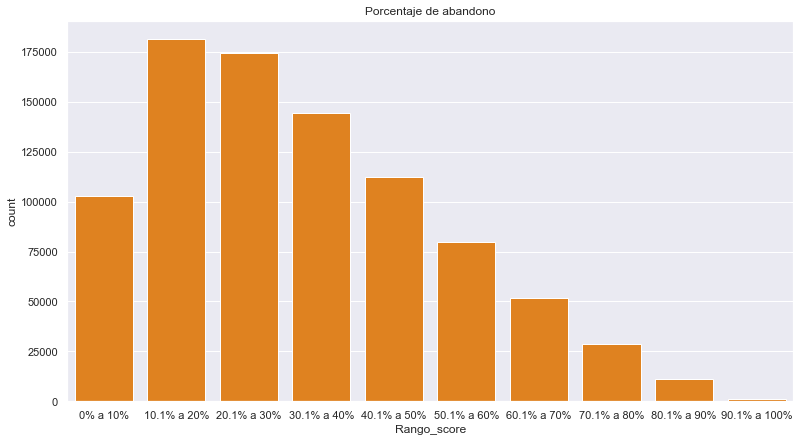

In [228]:
# Se gráfica el monto de venta por semana de cada tienda

por_abn = abandono.groupby('Rango_score').size()
por_abn = por_abn.to_frame()
por_abn.columns= ['count']
por_abn = por_abn.reset_index()
por_abn.head()

plt.figure(figsize=(13,7))
plt.title('Porcentaje de abandono')
sns.barplot(data = por_abn, x = 'Rango_score',y='count', color='#FF8300')
plt.show()

In [189]:
# ----------------------------- TODO -------------------------------------------------------------- #
# abandono.groupby(['Rango_score'])['conteo'].get_group(('80.1% a 90%','70.1% a 80%','60.1% a 70%')).count()
# abandono[(abandono['Rango_score']=='80.1% a 90%')|(abandono['Rango_score']=='70.1% a 80%')|
#          (abandono['Rango_score']=='60.1% a 70%')|(abandono['Rango_score']=='50.1% a 60%')].groupby('Rango_score')['conteo'].size()
# ----------------------------- TODO -------------------------------------------------------------- #

# Menor porcentaje de abandono
# abandono.groupby(['Rango_score'])['conteo'].get_group('40.1% a 50%').count() +\
# abandono.groupby(['Rango_score'])['conteo'].get_group('30.1% a 40%').count()+\
# abandono.groupby(['Rango_score'])['conteo'].get_group('60.1% a 70%').count()+\
# abandono.groupby(['Rango_score'])['conteo'].get_group('20.1% a 30%').count()

# Mayor porcentaje de abandono
abandono.groupby(['Rango_score'])['conteo'].get_group('80.1% a 90%').count() +\
abandono.groupby(['Rango_score'])['conteo'].get_group('70.1% a 80%').count()+\
abandono.groupby(['Rango_score'])['conteo'].get_group('60.1% a 70%').count()+\
abandono.groupby(['Rango_score'])['conteo'].get_group('50.1% a 60%').count()

171037

In [ ]:
mkt_abn_1 = abandono[(abandono['Rango_score']=='80.1% a 90%')|(abandono['Rango_score']=='70.1% a 80%')|
                     (abandono['Rango_score']=='60.1% a 70%')|(abandono['Rango_score']=='50.1% a 60%')]

In [195]:
mkt_abn_1



,seg,tipo_seg,con_crd,Rango_Ant,Rango_score,Rango_disp_prom,Rango_UDIR_anual,Rango_Num_Productos,rango_sdo_capta,conteo,udir_anual
65,Otros,EL,0,7 a 12,60.1% a 70%,10000 a 19999.9,-1000.1 a -500,1,100.01 a 1000,1,-0.75
97,Otros,EL,1,25 a 60,50.1% a 60%,20000 a 39999.9,5000.1 a más,Más de 2,10000.01 a 50000,1,30.72
108,Otros,EL,1,61 a 120,50.1% a 60%,10000 a 19999.9,5000.1 a más,Más de 2,10000.01 a 50000,1,11.27
109,Otros,EL,1,61 a 120,50.1% a 60%,10000 a 19999.9,5000.1 a más,Más de 2,50000.01 o más,1,128.94
110,Otros,EL,1,61 a 120,50.1% a 60%,60000 o más,5000.1 a más,Más de 2,50000.01 o más,1,126.42
...,...,...,...,...,...,...,...,...,...,...,...
886686,AA,Tpre,0,61 a 120,50.1% a 60%,10000 a 19999.9,500.1 a 1000,1,10000.01 a 50000,1,0.84
886687,AA,Tpre,0,61 a 120,50.1% a 60%,100 a 4999.9,1000.1 a 5000,Más de 2,50000.01 o más,1,2.03
886689,AA,Tpre,0,7 a 12,60.1% a 70%,100 a 4999.9,0.1 a 500,1,10000.01 a 50000,1,0.31
886690,AA,Tpre,0,7 a 12,70.1% a 80%,100 a 4999.9,-500.1 a 0,1,100.01 a 1000,1,-0.18


In [28]:
abandono.groupby('seg').size()

seg
AA        92467
BB       782650
Otros     11741
dtype: int64

In [9]:
abandono.groupby('Rango_disp_prom').size()

Rango_disp_prom
$0.1 a $99.9               77
$10,000 a $19,999.9    258302
$100 a $4,999.9        116906
$20,000 a $39,999.9    187701
$40,000 a $59,999.9     70336
$5,000 a $9,999.9      213367
$60,000 o más           40021
Sin dispersión            148
dtype: int64

In [29]:
abandono.groupby('Rango_Num_Productos').size()

Rango_Num_Productos
0              129
1           258478
2           320954
Más de 2    307297
dtype: int64

In [30]:
abandono.groupby('rango_sdo_capta').size()

rango_sdo_capta
$0 a $100                71499
$1,000.01 a $5,000      205541
$10,000.01 a $50,000    168791
$100.01 a $1,000        176706
$5,000.01 a $10,000     119970
$50,000.01 o más        143758
Sin Captación              593
dtype: int64

In [31]:
tg_obj = abandono[(abandono['Rango_score']=='60.1% a 70%')|(abandono['Rango_score']=='50.1% a 60%')|(abandono['Rango_score']=='70.1% a 80%')]
tg_obj.sample(5,random_state=50000)

,seg,tipo_seg,con_crd,Rango_Ant,Rango_score,Rango_disp_prom,Rango_UDIR_anual,Rango_Num_Productos,rango_sdo_capta,conteo,udir_anual
535073,BB,PL,0,7 a 12,60.1% a 70%,"$10,000 a $19,999.9","Menor igual a -$1,000",2,"$1,000.01 a $5,000",1,-1.20
273710,BB,PL,1,13 a 24,60.1% a 70%,"$5,000 a $9,999.9","$5,000.1 a más",Más de 2,"$10,000.01 a $50,000",1,9.54
157613,BB,PL,0,7 a 12,60.1% a 70%,"$20,000 a $39,999.9","Menor igual a -$1,000",1,"$10,000.01 a $50,000",2,-2.28
687680,BB,PL,1,61 a 120,50.1% a 60%,"$100 a $4,999.9","$5,000.1 a más",2,"$100.01 a $1,000",9,162.18
691809,BB,PL,1,7 a 12,70.1% a 80%,"$5,000 a $9,999.9",-$500.1 a $0,Más de 2,"$1,000.01 a $5,000",2,-0.43


In [13]:
tg_obj.groupby('seg').size()

seg
AA         5671
BB       153031
Otros      1244
dtype: int64

In [14]:
tg_obj.groupby('Rango_disp_prom').size().sort_values()

Rango_disp_prom
Sin dispersión             8
$0.1 a $99.9              29
$60,000 o más           3254
$40,000 a $59,999.9     5283
$20,000 a $39,999.9    18463
$100 a $4,999.9        34907
$10,000 a $19,999.9    42709
$5,000 a $9,999.9      55293
dtype: int64

In [15]:
tg_obj.groupby('Rango_Num_Productos').size().sort_values()

Rango_Num_Productos
0              57
Más de 2    41857
2           54338
1           63694
dtype: int64

In [16]:
tg_obj.groupby('rango_sdo_capta').size().sort_values()

rango_sdo_capta
Sin Captación             209
$50,000.01 o más         9528
$5,000.01 a $10,000     17195
$10,000.01 a $50,000    21954
$0 a $100               22062
$1,000.01 a $5,000      42321
$100.01 a $1,000        46677
dtype: int64

In [17]:
tg_obj.groupby('tipo_seg').size()

tipo_seg
EL           8
PE        1236
PL      146253
Pre       4750
TPL       6778
Tpre       921
dtype: int64

In [18]:
tg_obj_2 =tg_obj[(tg_obj['Rango_disp_prom']=='$10,000 a $19,999.9')|(tg_obj['Rango_disp_prom']=='$5,000 a $9,999.9')|(tg_obj['Rango_disp_prom']=='$20,000 a $39,999.9')]
tg_obj_3 = tg_obj_2[(tg_obj_2['Rango_Num_Productos']=='2')|(tg_obj_2['Rango_Num_Productos']=='1')]
tg_obj_4 = tg_obj_3[(tg_obj_3['rango_sdo_capta']=='$10,000.01 a $50,000')|(tg_obj_3['rango_sdo_capta']=='$1,000.01 a $5,000')]


In [19]:
tg_obj_4

,seg,tipo_seg,con_crd,Rango_Ant,Rango_score,Rango_disp_prom,Rango_UDIR_anual,Rango_Num_Productos,rango_sdo_capta,conteo,udir_anual
158,Otros,EL,1,61 a 120,50.1% a 60%,"$10,000 a $19,999.9",-$500.1 a $0,2,"$1,000.01 a $5,000",1,-0.29
1555,Otros,PE,0,61 a 120,50.1% a 60%,"$10,000 a $19,999.9","Menor igual a -$1,000",2,"$10,000.01 a $50,000",1,-1.22
1556,Otros,PE,0,61 a 120,50.1% a 60%,"$20,000 a $39,999.9","-$1,000.1 a -$500",2,"$10,000.01 a $50,000",1,-0.65
1558,Otros,PE,0,61 a 120,50.1% a 60%,"$20,000 a $39,999.9","$1,000.1 a $5,000",2,"$10,000.01 a $50,000",1,1.43
2436,Otros,PE,0,121 o más,50.1% a 60%,"$10,000 a $19,999.9","Menor igual a -$1,000",1,"$1,000.01 a $5,000",1,-1.57
...,...,...,...,...,...,...,...,...,...,...,...
884003,AA,Tpre,1,25 a 60,50.1% a 60%,"$20,000 a $39,999.9","$5,000.1 a más",2,"$10,000.01 a $50,000",1,19.69
884800,AA,Tpre,1,61 a 120,50.1% a 60%,"$10,000 a $19,999.9","$5,000.1 a más",2,"$1,000.01 a $5,000",1,29.98
885415,AA,Tpre,0,13 a 24,60.1% a 70%,"$20,000 a $39,999.9",$0.1 a $500,2,"$1,000.01 a $5,000",1,0.22
886651,AA,Tpre,0,13 a 24,50.1% a 60%,"$10,000 a $19,999.9",-$500.1 a $0,1,"$10,000.01 a $50,000",1,-0.04


ValueError: could not convert string to float: '$1,000.01 a $5,000'

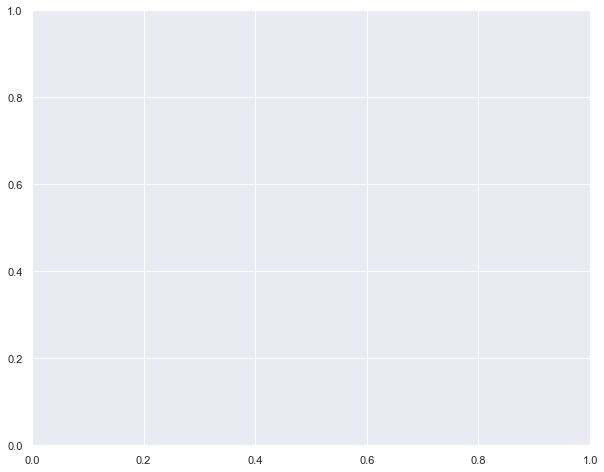

In [20]:
# plt.figure(figsize=(12,8))
# plt.title('')
# sns.barplot(x=tg_obj_4.Rango_score, y=tg_obj_4.rango_sdo_capta, color = '#0171CE')
# plt.xlabel('')
# plt.ylabel('')
# plt.show()


plt.figure(figsize=(10,8))
sns.distplot(tg_obj_4.rango_sdo_capta,color='#01949A', kde=True)
plt.title('Distribución de ventas, tienda 14')
plt.xlabel('Ventas [Dolares]')
plt.show()